Mosquitos data : 

Desmond H. Foley, Leopoldo M. Rueda, Richard C. Wilkerson, Insight into Global Mosquito Biogeography from Country Species Records, Journal of Medical Entomology, Volume 44, Issue 4, 1 July 2007, Pages 554–567, https://doi.org/10.1093/jmedent/44.4.554 

Temperature data : Average yearly temperature is calculated by averaging the minimum and maximum daily temperatures in the country, averaged for the years 1991 – 2020
 https://climateknowledgeportal.worldbank.org/

Precipitation data : Total precipitation (depth in mm) in 2020 
https://data.worldbank.org/indicator/AG.LND.PRCP.MM?end=2020&most_recent_value_desc=true&start=2020&view=bar&year=2020

Area data : Total area (km^2) in 2021 
https://data.worldbank.org/indicator/AG.SRF.TOTL.K2?end=2021&start=1961


The number of mosquito species known from an area is a result of the intrinsic species richness, determined largely by environment and history, and sampling effort.

Correcting species number for geographic area is necessary to compare countries of different sizes for relative mosquito species density. Species number does not vary linearly with area and the exponential, power and logistic functions have been proposed to describe this mathematical relationship (Scheiner 2003). Consensus favors the power function as the best fit (Scheiner 2003), and this relationship is linear for log-log representations. Mosquito SAR have not been reported to our knowledge.

In [ ]:
!git clone https://github.com/lfostier/atelier_chatGPT.git

In [ ]:
cd atelier_chatGPT


In [ ]:
!git pull

### Importer les données à partir des fichiers csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df_mous = pd.read_csv('mosquito_data.csv')
df_pluie = pd.read_csv('precipitation_data.csv')
df_temp = pd.read_csv('temperature_data.csv')
df_area = pd.read_csv('area_data.csv')

# Let's see the first few rows of the data
print(df_mous.head())
print(df_pluie.head())
print(df_temp.head())
print(df_area.head())



         Country  MosquitoPopulationTotalSpecies  \
0          India                           338.0   
1          China                           238.0   
2  United States                           175.0   
3      Indonesia                           439.0   
4       Pakistan                            89.0   

   MosquitoPopulationEndemicSpecies  MosquitoPopulationTotalSpeciesType  
0                              53.0                               271.0  
1                              85.0                               128.0  
2                              31.0                               186.0  
3                             108.0                               201.0  
4                               3.0                                16.0  
                 Country  Precipitation
0               Colombia           3240
1  São Tomé and Príncipe           3200
2                 Tuvalu           3200
3       Papua New Guinea           3142
4        Solomon Islands           3028
   

### Clean data

In [2]:

# Vérification des valeurs manquantes et des doublons
print(" Missing values in df_mous: ", df_mous.isnull().sum())
print(" Missing values in df_pluie: ", df_pluie.isnull().sum())
print(" Missing values in df_temp: ", df_temp.isnull().sum())
print(" Missing values in df_area: ", df_area.isnull().sum())

#check data types
print(df_mous.dtypes)
print(df_pluie.dtypes)
print(df_temp.dtypes)
print(df_area.dtypes)

#convert Precipitation and Temperature to float
df_pluie['Precipitation'] = df_pluie['Precipitation'].astype(float)
df_temp['Temperature'] = df_temp['Temperature'].astype(float)

print(df_pluie.dtypes)
print(df_temp.dtypes)


 Missing values in df_mous:  Country                                0
MosquitoPopulationTotalSpecies         2
MosquitoPopulationEndemicSpecies      81
MosquitoPopulationTotalSpeciesType    33
dtype: int64
 Missing values in df_pluie:  Country          0
Precipitation    0
dtype: int64
 Missing values in df_temp:  Country        0
Temperature    0
dtype: int64
 Missing values in df_area:  Country    0
Area       2
dtype: int64
Country                                object
MosquitoPopulationTotalSpecies        float64
MosquitoPopulationEndemicSpecies      float64
MosquitoPopulationTotalSpeciesType    float64
dtype: object
Country          object
Precipitation     int64
dtype: object
Country         object
Temperature    float64
dtype: object
Country     object
Area       float64
dtype: object
Country           object
Precipitation    float64
dtype: object
Country         object
Temperature    float64
dtype: object


In [3]:

# Supprimer les lignes contenant des NaN dans chaque DataFrame
df_mous_clean = df_mous.dropna()
df_pluie_clean = df_pluie.dropna()
df_temp_clean = df_temp.dropna()
df_area_clean = df_area.dropna()

# Fusionner les DataFrames nettoyés sur la colonne 'Country', en ne gardant que les pays communs
df_combined_clean = pd.merge(df_mous_clean, df_pluie_clean, on='Country', how='inner')
df_combined_clean = pd.merge(df_combined_clean, df_temp_clean, on='Country', how='inner')
df_combined_clean = pd.merge(df_combined_clean, df_area_clean, on='Country', how='inner')

# Afficher les premières lignes du DataFrame nettoyé et fusionné
print(df_combined_clean.head())


# print the number of countries in the final dataset
print("Number of countries in the final dataset: ", df_combined_clean['Country'].nunique())


#describe the final dataset
print(df_combined_clean.describe())


         Country  MosquitoPopulationTotalSpecies  \
0          India                           338.0   
1          China                           238.0   
2  United States                           175.0   
3      Indonesia                           439.0   
4       Pakistan                            89.0   

   MosquitoPopulationEndemicSpecies  MosquitoPopulationTotalSpeciesType  \
0                              53.0                               271.0   
1                              85.0                               128.0   
2                              31.0                               186.0   
3                             108.0                               201.0   
4                               3.0                                16.0   

   Precipitation  Temperature        Area  
0         1083.0        24.94  3287260.00  
1          645.0         7.59  9562910.00  
2          715.0         9.46  9831510.00  
3         2702.0        25.96  1916906.77  
4          494.0

## Analyse descripitive

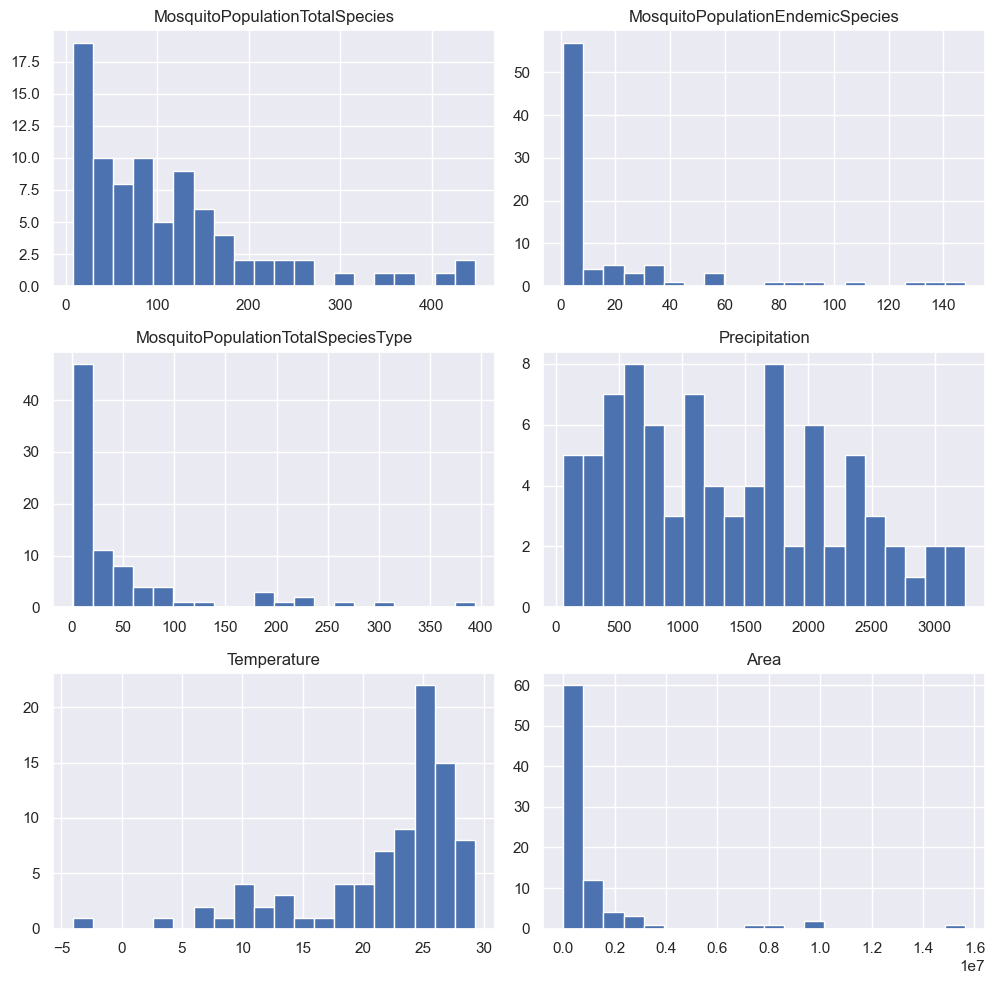

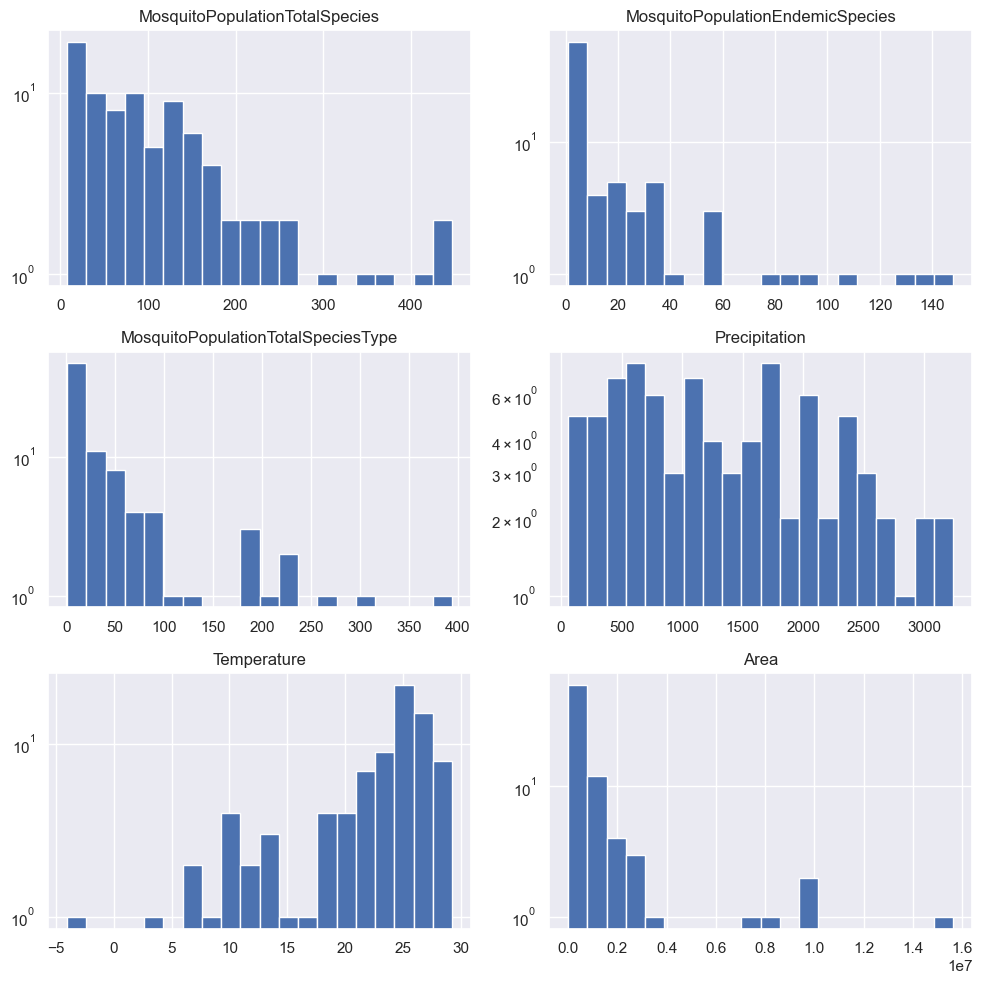

In [4]:
# distribution of MosqituoPopulationTotalSpecies, Precipitation, Temperature, Area
sns.set()
df_combined_clean.hist(figsize=(10, 10), bins=20)
plt.tight_layout()
plt.show()

#en echelle log
df_combined_clean.hist(figsize=(10, 10), log=True, bins=20)
plt.tight_layout()
plt.show()



## Analyse bivariée

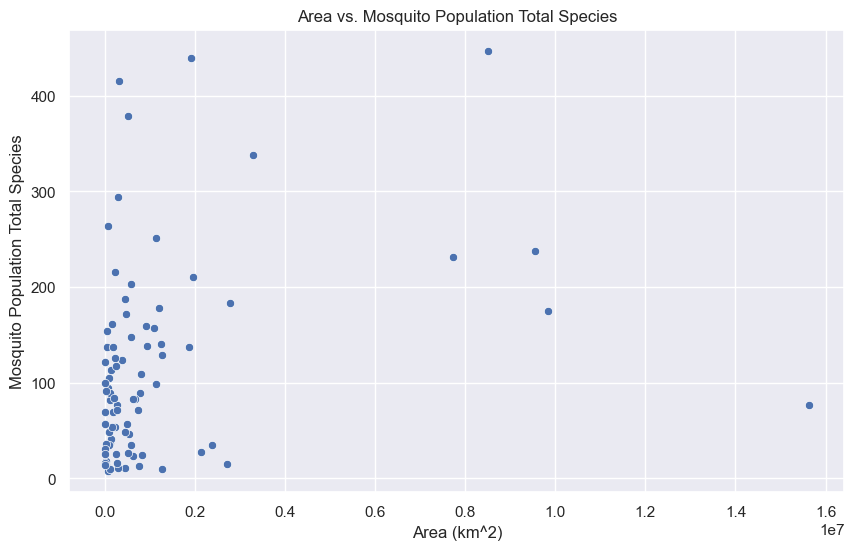

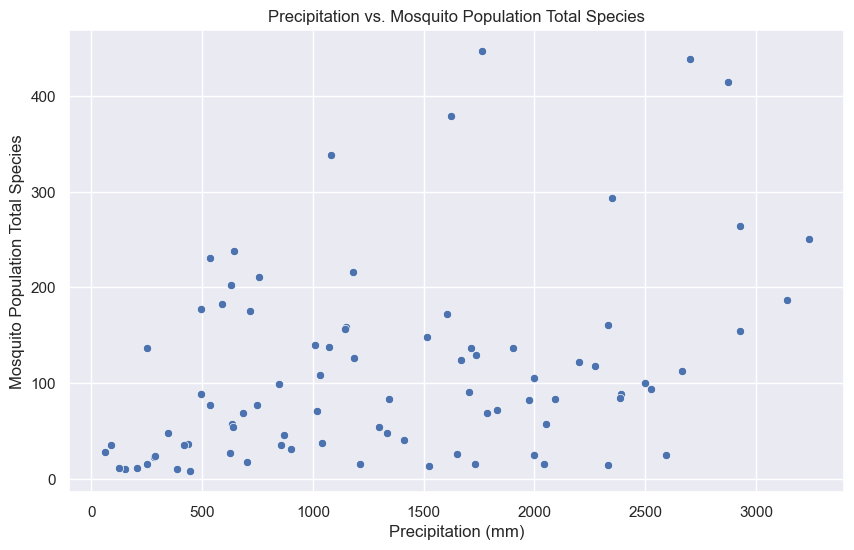

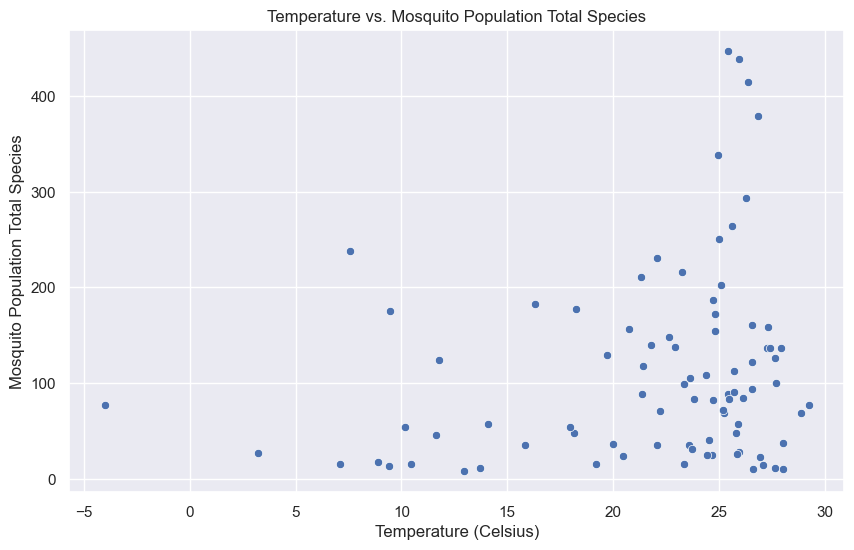

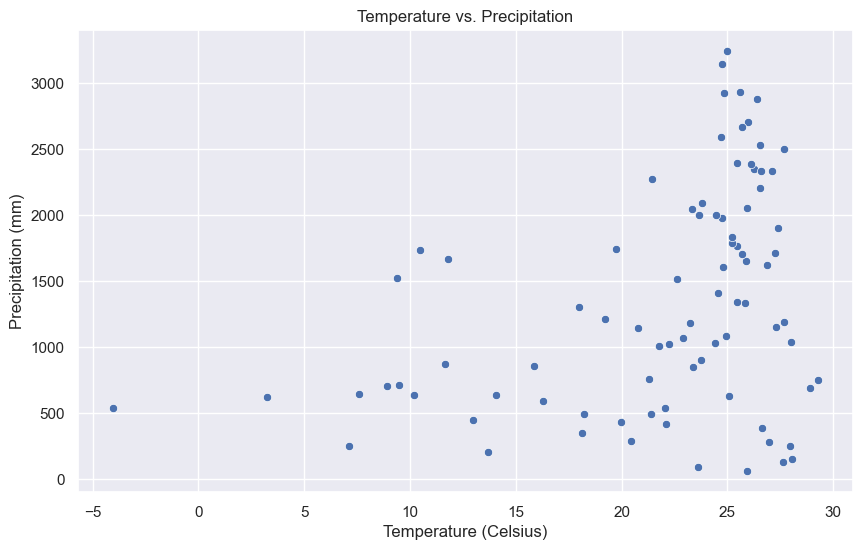

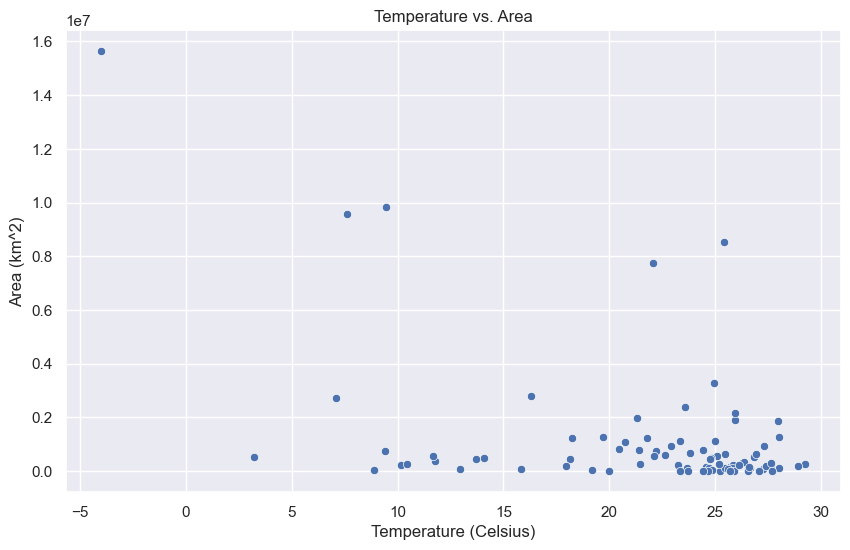

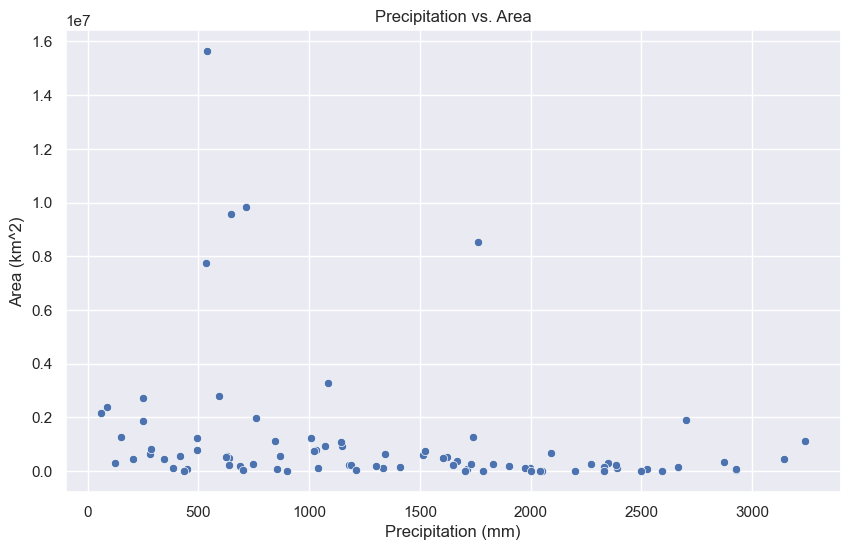

In [5]:
#### Tracés de dispersion

# plot of area vs. log of mosquito population total species
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_combined_clean['Area'], y=df_combined_clean['MosquitoPopulationTotalSpecies'])
plt.xlabel('Area (km^2)')
plt.ylabel('Mosquito Population Total Species')
plt.title('Area vs. Mosquito Population Total Species')
plt.show()

# plot precipitation vs. mosquito population total species
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_combined_clean['Precipitation'], y=df_combined_clean['MosquitoPopulationTotalSpecies'])
plt.xlabel('Precipitation (mm)')
plt.ylabel('Mosquito Population Total Species')
plt.title('Precipitation vs. Mosquito Population Total Species')
plt.show()


#plot temperature vs. mosquito population total species
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_combined_clean['Temperature'], y=df_combined_clean['MosquitoPopulationTotalSpecies'])
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Mosquito Population Total Species')
plt.title('Temperature vs. Mosquito Population Total Species')
plt.show()

#plot temperature vs. precipitation
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_combined_clean['Temperature'], y=df_combined_clean['Precipitation'])
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Precipitation (mm)')
plt.title('Temperature vs. Precipitation')
plt.show()

#plot temperature vs. area
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_combined_clean['Temperature'], y=df_combined_clean['Area'])
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Area (km^2)')
plt.title('Temperature vs. Area')
plt.show()

#plot precipitation vs. area
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_combined_clean['Precipitation'], y=df_combined_clean['Area'])
plt.xlabel('Precipitation (mm)')
plt.ylabel('Area (km^2)')
plt.title('Precipitation vs. Area')
plt.show()



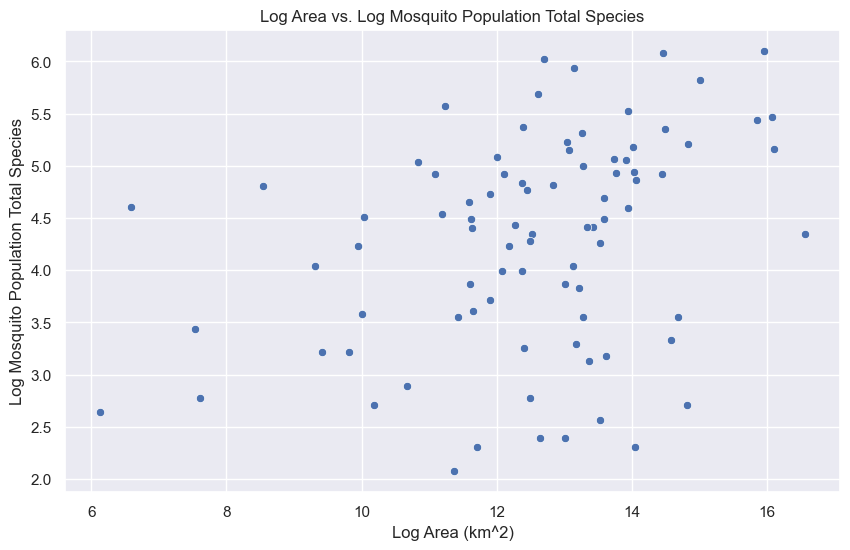

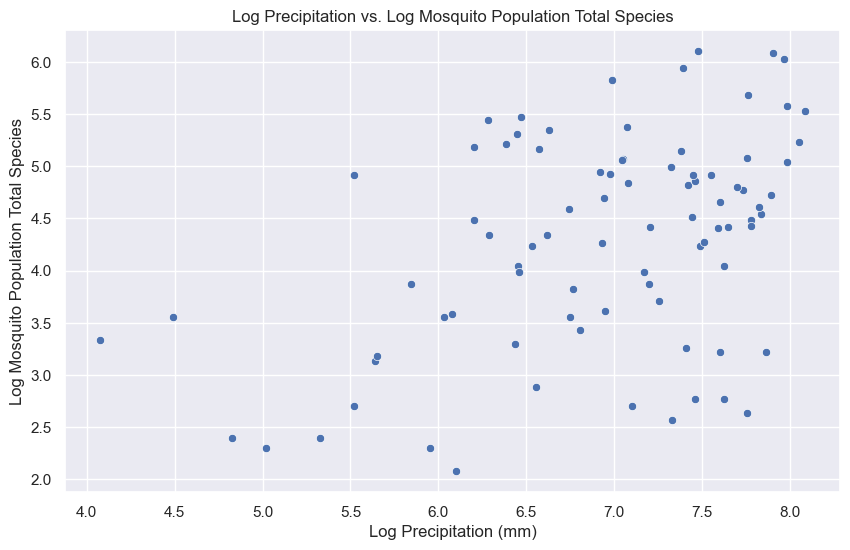

In [6]:
#log area vs. log mosquito population total species
plt.figure(figsize=(10, 6))
sns.scatterplot(x=np.log(df_combined_clean['Area']), y=np.log(df_combined_clean['MosquitoPopulationTotalSpecies']))
plt.xlabel('Log Area (km^2)')
plt.ylabel('Log Mosquito Population Total Species')
plt.title('Log Area vs. Log Mosquito Population Total Species')
plt.show()

#log precipitation vs. log mosquito population total species
plt.figure(figsize=(10, 6))
sns.scatterplot(x=np.log(df_combined_clean['Precipitation']), y=np.log(df_combined_clean['MosquitoPopulationTotalSpecies']))
plt.xlabel('Log Precipitation (mm)')
plt.ylabel('Log Mosquito Population Total Species')
plt.title('Log Precipitation vs. Log Mosquito Population Total Species')
plt.show()



In [7]:
# add a new column to the DataFrame that contains the log of the mosquito population total species, the log of the precipitation, the log of the temperature, and the log of the area
df_combined_clean['LogMosquitoPopulationTotalSpecies'] = np.log(df_combined_clean['MosquitoPopulationTotalSpecies'])
df_combined_clean['LogArea'] = np.log(df_combined_clean['Precipitation'])
df_combined_clean['LogTemperature'] = np.log(df_combined_clean['Temperature'])
df_combined_clean['LogArea'] = np.log(df_combined_clean['Area'])


/home/lfostier/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


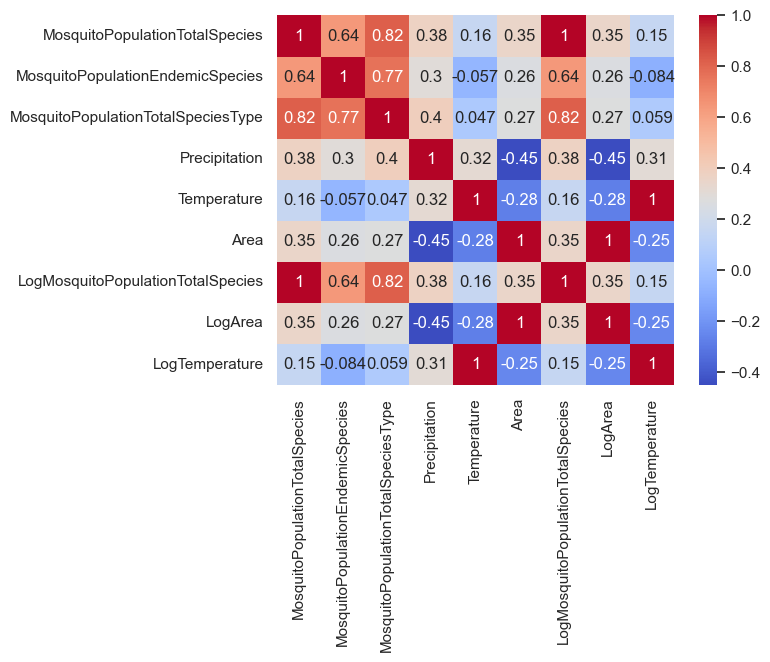

In [9]:
### Corrélations monotones
# spearman correlation matrix (monotonic relationship) sans la colonne 'Country'
corr = df_combined_clean.drop('Country', axis=1).corr(method='spearman')
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


In [ ]:

#correlation matrix (pearson correlation : linear)
corr = df_combined_clean.drop('Country', axis=1).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
#### test de significativité pour spearman correlation
from scipy.stats import spearmanr

# test de significativité entre la population totale d'espèces de moustiques et la précipitation
corr, p_value = spearmanr(df_combined_clean['MosquitoPopulationTotalSpecies'], df_combined_clean['Precipitation'])
print("Correlation between Mosquito Population Total Species and Precipitation: ", corr, "P-value: ", p_value)

# test de significativité entre la population totale d'espèces de moustiques et la température
corr, p_value = spearmanr(df_combined_clean['MosquitoPopulationTotalSpecies'], df_combined_clean['Temperature'])
print("Correlation between Mosquito Population Total Species and Temperature: ", corr, "P-value: ", p_value)

# test de significativité entre la population totale d'espèces de moustiques et la superficie
corr, p_value = spearmanr(df_combined_clean['MosquitoPopulationTotalSpecies'], df_combined_clean['Area'])
print("Correlation between Mosquito Population Total Species and Area: ", corr, "P-value: ", p_value)

# test de significativité entre la précipitation et la température
corr, p_value = spearmanr(df_combined_clean['Precipitation'], df_combined_clean['Temperature'])
print("Correlation between Precipitation and Temperature: ", corr, "P-value: ", p_value)

# test de significativité entre la précipitation et la superficie
corr, p_value = spearmanr(df_combined_clean['Precipitation'], df_combined_clean['Area'])
print("Correlation between Precipitation and Area: ", corr, "P-value: ", p_value)

# test de significativité entre la température et la superficie
corr, p_value = spearmanr(df_combined_clean['Temperature'], df_combined_clean['Area'])
print("Correlation between Temperature and Area: ", corr, "P-value: ", p_value)



## Regression lineaire simple (precipitation)

In [ ]:
#### Régression linéaire simple entre la population totale d'espèces de moustiques et la précipitation
from sklearn.linear_model import LinearRegression

# créer un objet de régression linéaire
regression = LinearRegression()

# ajuster le modèle de régression linéaire (LogMosquitoPopulationTotalSpecies = b0 + b1*LogPrecipitation)
regression.fit(df_combined_clean[['LogPrecipitation']], df_combined_clean['LogMosquitoPopulationTotalSpecies'])

# obtenir les coefficients de régression
b0 = regression.intercept_
b1 = regression.coef_[0]

# afficher les coefficients de régression
print("Intercept: ", b0)
print("Coefficient: ", b1)

# tracer la régression linéaire
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_combined_clean['LogPrecipitation'], y=df_combined_clean['LogMosquitoPopulationTotalSpecies'])
plt.plot(df_combined_clean['LogPrecipitation'], b0 + b1*df_combined_clean['LogPrecipitation'], color='red')
plt.xlabel('Log Precipitation (mm)')
plt.ylabel('Log Mosquito Population Total Species')
plt.title('Log Precipitation vs. Log Mosquito Population Total Species')
plt.show()

# calculer le coefficient de détermination (R^2)
r_squared = regression.score(df_combined_clean[['LogPrecipitation']], df_combined_clean['LogMosquitoPopulationTotalSpecies'])
print("R^2: ", r_squared)


# verifier les hypothèses de la régression linéaire
# vérifier la normalité des résidus
residuals = df_combined_clean['LogMosquitoPopulationTotalSpecies'] - (b0 + b1*df_combined_clean['LogPrecipitation'])
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()
#Q-Q plot
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

# vérifier l'homoscédasticité des résidus (residuals vs. predicted values)
plt.figure(figsize=(10, 6))
y_pred = b0 + b1*df_combined_clean['LogPrecipitation']
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()


# faire les test de normalité et d'homoscédasticité
from scipy.stats import shapiro
# test de normalité
stat, p_value = shapiro(residuals)
print("Shapiro-Wilk Test - Statistic: ", stat, "P-value: ", p_value)

# test d'homoscédasticité
from statsmodels.stats.diagnostic import het_breuschpagan
stat, p_value, _, _ = het_breuschpagan(residuals, df_combined_clean[['LogPrecipitation']])
print("Breusch-Pagan Test - Statistic: ", stat, "P-value: ", p_value)


## Regression lineaire simple (Area)

In [ ]:
#### Régression linéaire simple entre la population totale d'espèces de moustiques et la précipitation
from sklearn.linear_model import LinearRegression

# créer un objet de régression linéaire
regression = LinearRegression()

# ajuster le modèle de régression linéaire (LogMosquitoPopulationTotalSpecies = b0 + b1*LogArea)
regression.fit(df_combined_clean[['LogArea']], df_combined_clean['LogMosquitoPopulationTotalSpecies'])

# obtenir les coefficients de régression
b0 = regression.intercept_
b1 = regression.coef_[0]

# afficher les coefficients de régression
print("Intercept: ", b0)
print("Coefficient: ", b1)

# tracer la régression linéaire
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_combined_clean['LogArea'], y=df_combined_clean['LogMosquitoPopulationTotalSpecies'])
plt.plot(df_combined_clean['LogArea'], b0 + b1*df_combined_clean['LogArea'], color='red')
plt.xlabel('Log Area')
plt.ylabel('Log Mosquito Population Total Species')
plt.title('Log Area vs. Log Mosquito Population Total Species')
plt.show()

# calculer le coefficient de détermination (R^2)
r_squared = regression.score(df_combined_clean[['LogArea']], df_combined_clean['LogMosquitoPopulationTotalSpecies'])
print("R^2: ", r_squared)


# verifier les hypothèses de la régression linéaire
# vérifier la normalité des résidus
residuals = df_combined_clean['LogMosquitoPopulationTotalSpecies'] - (b0 + b1*df_combined_clean['LogArea'])
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()
#Q-Q plot
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

# vérifier l'homoscédasticité des résidus (residuals vs. predicted values)
plt.figure(figsize=(10, 6))
y_pred = b0 + b1*df_combined_clean['LogArea']
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Predicted Values vs. Residuals')
plt.show()


# test de normalité et d'homoscédasticité
from scipy.stats import shapiro
# test de normalité
stat, p_value = shapiro(residuals)
print("Shapiro-Wilk Test - Statistic: ", stat, "P-value: ", p_value)

# test d'homoscédasticité
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(residuals, df_combined_clean[['LogArea']])
print("Breusch-Pagan Test - LM Statistic: ", bp_test[0], "P-value: ", bp_test[1])


## Regression lineaire multiple (precipation + aire)

In [ ]:
## plot a heatmap with x-axis as temperature, y-axis as precipitation, and color as the mosquito population total species
plt.figure(figsize=(10, 6))
sns.heatmap(df_combined_clean.pivot_table(index='LogPrecipitation', columns='LogArea', values='LogMosquitoPopulationTotalSpecies'), cmap='coolwarm')
plt.xlabel('Log Temperature (Celsius)')
plt.ylabel('Log Precipitation (mm)')
plt.title('Heatmap of Mosquito Population Total Species')
plt.show()

## other representations (3D plot)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_combined_clean['LogPrecipitation'], df_combined_clean['LogTemperature'], df_combined_clean['LogMosquitoPopulationTotalSpecies'])
ax.set_xlabel('Log Precipitation (mm)')
ax.set_ylabel('Log Temperature (Celsius)')
ax.set_zlabel('Log Mosquito Population Total Species')
plt.title('3D Plot of Mosquito Population Total Species')
plt.show()




In [ ]:
#### Régression linéaire multiple
import statsmodels.api as sm
# créer un objet de régression linéaire
regression = LinearRegression()

# ajuster le modèle de régression linéaire (LogMosquitoPopulationTotalSpecies = b0 + b1*LogPrecipitation + b2*LogArea)

regression.fit(df_combined_clean[['LogPrecipitation', 'LogArea']], df_combined_clean['LogMosquitoPopulationTotalSpecies'])

# obtenir les coefficients de régression
b0 = regression.intercept_
b1 = regression.coef_[0]
b2 = regression.coef_[1]

# afficher les coefficients de régression
print("Intercept: ", b0)
print("Coefficient for LogPrecipitation: ", b1)
print("Coefficient for LogArea: ", b2)


# Préparer les données pour statsmodels
X = df_combined_clean[['LogPrecipitation', 'LogArea']]
X = sm.add_constant(X)  # Ajouter une constante pour l'ordonnée à l'origine
y = df_combined_clean['LogMosquitoPopulationTotalSpecies']

# Ajuster le modèle avec statsmodels
model = sm.OLS(y, X).fit()

# Résultats du modèle
print(model.summary())

# Extraire le coefficient R^2
r_squared = model.rsquared
print(f'Coefficient R^2: {r_squared:.4f}')

# Extraire les p-values des coefficients
p_values = model.pvalues
print(f'P-value for intercept: {p_values["const"]:.4f}')
print(f'P-value for LogPrecipitation: {p_values["LogPrecipitation"]:.4f}')
print(f'P-value for LogArea: {p_values["LogArea"]:.4f}')

# vérifier les hypothèses de la régression linéaire multiple
# vérifier l'independance des résidus (Durbin-Watson test)
from statsmodels.stats.stattools import durbin_watson
durbin_watson_test = durbin_watson(residuals)
print("Durbin-Watson Test: ", durbin_watson_test, " (Close to 2 means no autocorrelation)")



# vérifier l'homoscédasticité des résidus (residuals vs. predicted values)
plt.figure(figsize=(10, 6))
#predicted values
y_pred = b0 + b1*df_combined_clean['LogPrecipitation'] + b2*df_combined_clean['LogArea']
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Predicted Values vs. Residuals')
plt.show()
# test d'homoscédasticité
bp_test = het_breuschpagan(residuals, df_combined_clean[['LogPrecipitation', 'LogArea']])
print("Breusch-Pagan Test - LM Statistic: ", bp_test[0], "P-value: ", bp_test[1])


# vérifier la normalité des résidus
# test de normalité
stat, p_value = shapiro(residuals)
print("Shapiro-Wilk Test - Statistic: ", stat, "P-value: ", p_value)

#Q-Q plot
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()







